In [2]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_N(images):
    fig = plt.figure(figsize=(10 * len(images), 10))
    gs = GridSpec(nrows=1, ncols=len(images))
    gs.update( hspace = 0.5, wspace = 0.)
    for i in range(len(images)):
        ax = fig.add_subplot(gs[0, i])
        im = ax.imshow(images[i])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()  
        

In [3]:
def crop_w_minimum_bbox(img):
    h, w, _ = img.shape
    left_w, right_w, top_h, bottom_h = 0, w - 1, 0, h - 1
    for i in range(0, w // 2):
        if np.any(img[:, i] < 255):
            left_w = i; break;

    for i in range(w - 1, w // 2, -1):
        if np.any(img[:, i] < 255):
            right_w = i; break;

    for i in range(0, h // 2):
        if np.any(img[i, :] < 255):
            top_h = i; break;
            
    for i in range(h - 1, h // 2, -1):
        if np.any(img[i, :] < 255):
            bottom_h = i; break;

    cropped_img = img[top_h:bottom_h + 1, left_w: right_w + 1]
    return cropped_img
    

In [11]:
for folder in os.listdir('./'):
    if not folder.startswith('_') and not folder.startswith('.'):
        targets = glob.glob(f'{folder}/*.png')
        for target in targets:
            point_path = target
            img = cv2.imread(point_path)
            img = crop_w_minimum_bbox(img)
            cv2.imwrite(point_path, img)
            # plot_N([img])

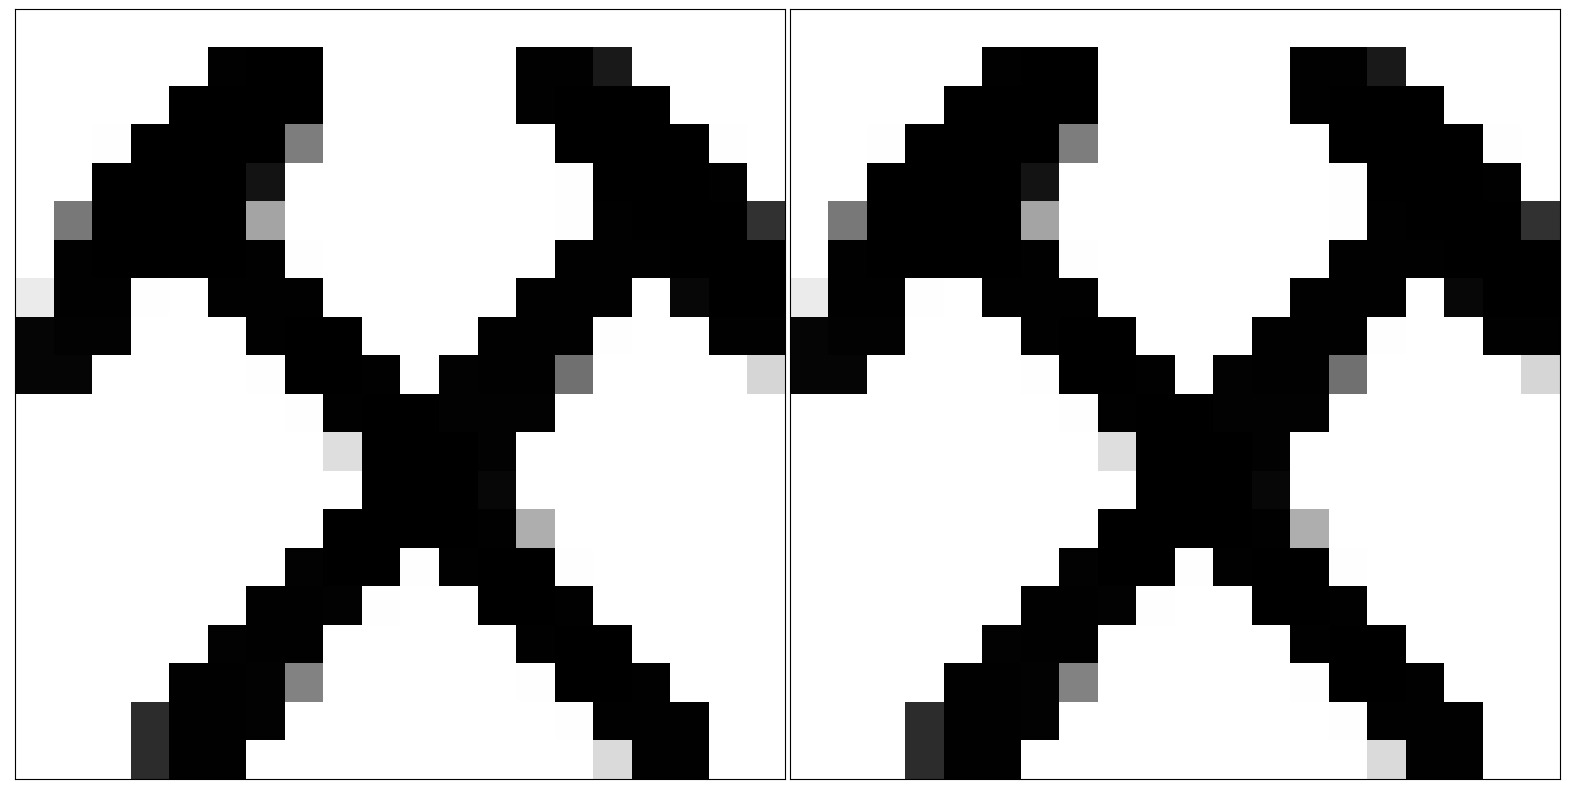

In [8]:
img = cv2.imread('quarry_open_pit/1.png')
img1 = cv2.resize(img, (20, 20))
# img = cv2.imread('quarry_open_pit/2.png')
# img2 = cv2.resize(img, (20, 20))
kernel = np.ones((2, 2), np.uint8) 
img1 = cv2.erode(img1, kernel, iterations=1)
plot_N([img1, img1])